# Predictive Maintenance

# Background
I will be using the data from UCI about predictive maintenance. The purpose of this project is to apply machine learning algorithm in the context of reliability engineering.

## Objective
Prediction of whether mechanical part will fail is an important knowledge in the industry. The failure of mechnical component can disrupt and even stop the production flow in a factory, for example. Hence, developing a model that can be used to predict the failure of a mechanical part  can be important so that corrective and preventive action such as maintainance can be performed and planned to avoid production loss.

## Problem Statement
Q1: how to predict component failure without having to stop  the machine operation and perform destructive test?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
# Description of data
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df[['Product ID']].value_counts()

Product ID
M24859        1
L51058        1
L51068        1
L51067        1
L51066        1
             ..
L56582        1
L56580        1
L56579        1
L56576        1
H29424        1
Length: 10000, dtype: int64

Since Product ID & UDI is unique, we will remove form datasets

In [7]:
df = df.drop(columns=['UDI','Product ID'])

In [8]:
df.isna().any()

Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Target                     False
Failure Type               False
dtype: bool

### Conclusion for Missing data
no missing data for this datasets

In [9]:
df[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
    ,'Torque [Nm]','Tool wear [min]']].duplicated().sum()

0

no duplicated data for this datasets

# Exploratory Data Analysis

In [10]:
Numerical_Features = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
    ,'Torque [Nm]','Tool wear [min]']]
Categorical_Features = df[['Type']]
Target = df[['Target','Failure Type']]

## Numerical

In [11]:
# distribution of the data
Numerical_Features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


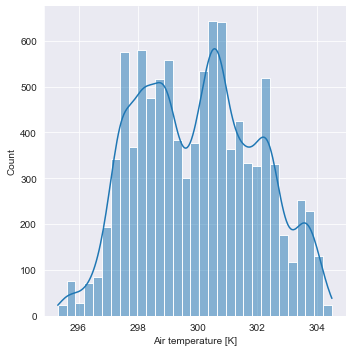

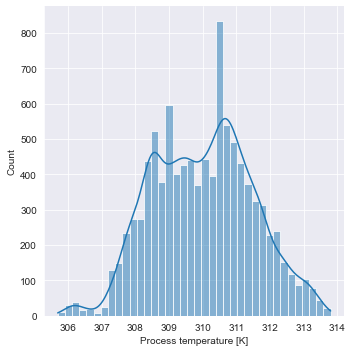

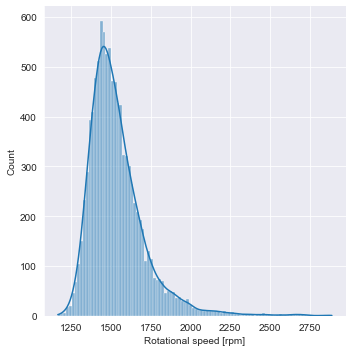

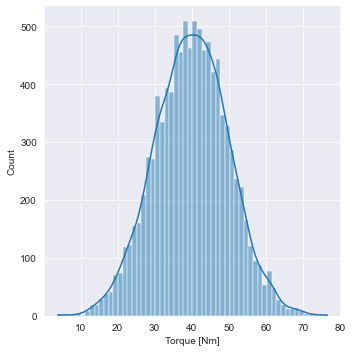

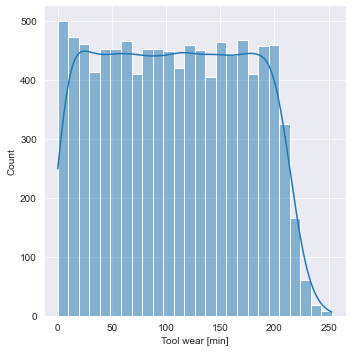

In [12]:
for col in Numerical_Features:
    ax = sns.displot(data=df, x = col, kde=True)

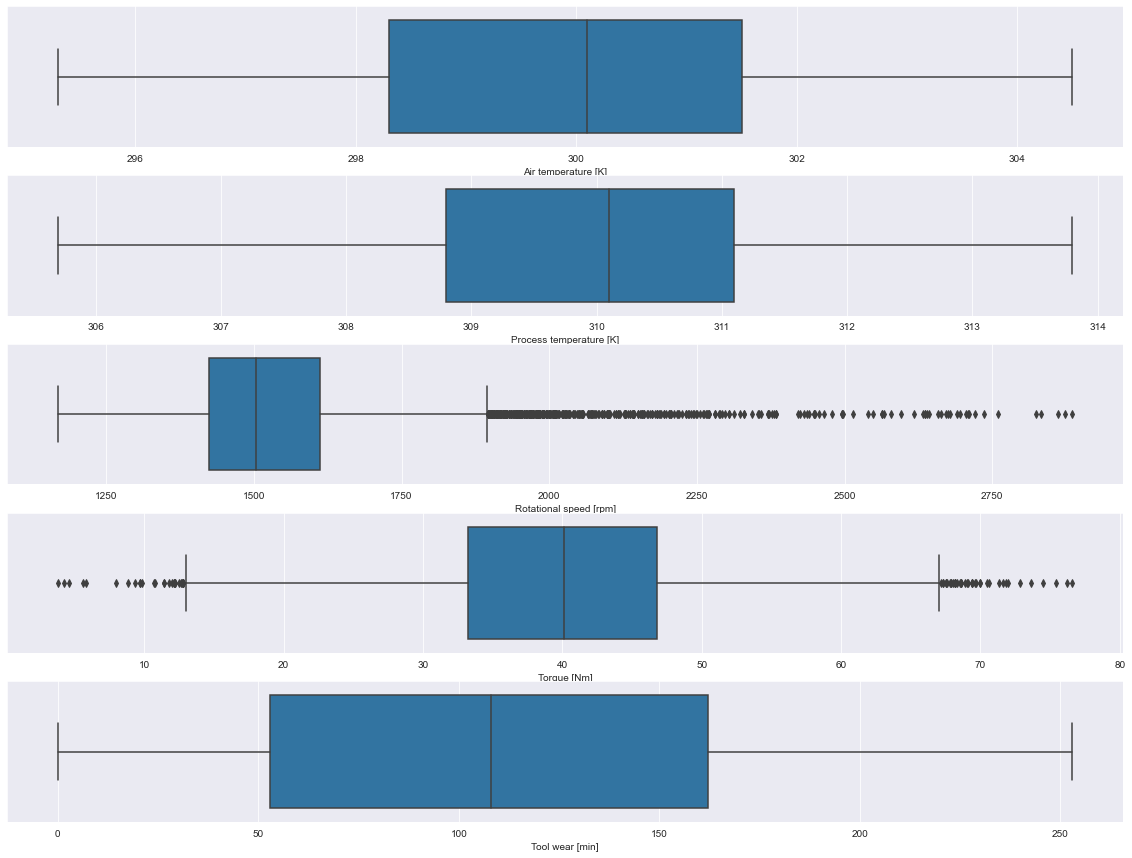

In [13]:
fig = plt.figure(figsize=(20,15))
for i,col in enumerate(Numerical_Features):
    plt.subplot(5,1,i+1)
    ax = sns.boxplot(data=df, x = col)

Since there are outliers in relational speed & torque variables, we will use algorithm that's not sensitive to outliers

## Categorical

In [14]:
for i in Categorical_Features.columns:
    print("------------------Feature: {}---------------------\n".format(i))
    print(Categorical_Features[i].value_counts(),'\n')

------------------Feature: Type---------------------

L    6000
M    2997
H    1003
Name: Type, dtype: int64 



In [15]:
for i in Target.columns:
    print("------------------Target variable: {}---------------------\n".format(i))
    print(Target[i].value_counts(),'\n')

------------------Target variable: Target---------------------

0    9661
1     339
Name: Target, dtype: int64 

------------------Target variable: Failure Type---------------------

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64 



Value % of Type column
L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64 



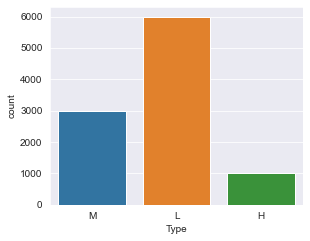

In [16]:
#Percentage for Categorical Variable
for col in Categorical_Features:
    print(f"Value % of {col} column")
    print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot for Categorical Variable
plt.figure(figsize=(10,8))

for i,col in enumerate(Categorical_Features):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)

Value % of Target column
0    96.61
1     3.39
Name: Target, dtype: float64 

Value % of Failure Type column
No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64 



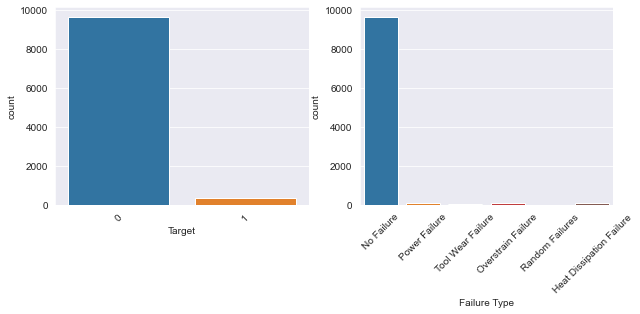

In [17]:
#Percentage
for col in Target:
    print(f"Value % of {col} column")
    print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot
plt.figure(figsize=(10,8))

for i,col in enumerate(Target):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)
    plt.xticks(rotation=45)

# Failure Pattern

In [18]:
pd.pivot_table(df, values=df[['Target']],index=['Failure Type'], aggfunc=['count'] )

,count
,Target
Failure Type,
Heat Dissipation Failure,112
No Failure,9652
Overstrain Failure,78
Power Failure,95
Random Failures,18
Tool Wear Failure,45


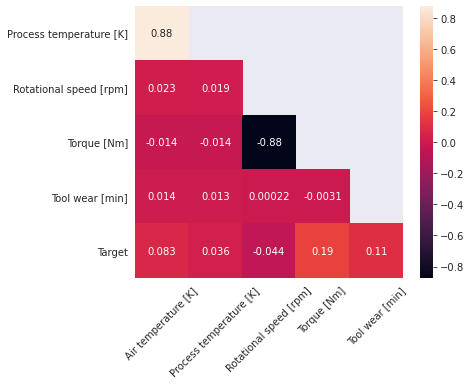

In [19]:
corr = df.corr()
f, ax = plt.subplots(figsize=(6, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask)
plt.style.use("default")
plt.xticks(rotation=45)
plt.show()

## Observation from Correlation Investigation

- Rotational Speed & Torque is highly negatively correlated
- Air temperature & process temperature is highly positively correlated

We will consider to not use some redundant features

## Treatment for Categorical Variable & Target Variable

In [20]:
df_onehot_cat = df[['Type']]
df_onehot_cat = pd.get_dummies(data=df_onehot_cat)
df_onehot_cat

,Type_H,Type_L,Type_M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [21]:
# df_target = pd.DataFrame()
# df_target['Failure Type']=df['Failure Type'].map({'Yes':1,'No':0})
# df_target

In [22]:
X = pd.concat([df_onehot_cat,Numerical_Features],axis=1)
y = Target[['Target']]

In [23]:
X.head()

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,0,1,298.1,308.6,1551,42.8,0
1,0,1,0,298.2,308.7,1408,46.3,3
2,0,1,0,298.1,308.5,1498,49.4,5
3,0,1,0,298.2,308.6,1433,39.5,7
4,0,1,0,298.2,308.7,1408,40.0,9


# Data Preparation for Modelling
### Renaming Columns

In [24]:
X.rename(columns = {'Air temperature [K]': 'Air_temperature', 'Process temperature [K]': 'Process_temperature', 'Rotational speed [rpm]': 'Rotational_speed', 'Torque [Nm]': 'Torque', 'Tool wear [min]': 'Tool_wear'}, inplace = True)
X.head()

,Type_H,Type_L,Type_M,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,0,0,1,298.1,308.6,1551,42.8,0
1,0,1,0,298.2,308.7,1408,46.3,3
2,0,1,0,298.1,308.5,1498,49.4,5
3,0,1,0,298.2,308.6,1433,39.5,7
4,0,1,0,298.2,308.7,1408,40.0,9


### Split Data for Test, Train, Validation

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000, 1), (2000, 1))

### Rescaling

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [29]:
X_train.head()

,Type_H,Type_L,Type_M,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
9254,0,1,0,-0.854066,-0.609589,0.427634,-0.892696,1.375035
1561,0,1,0,-0.904014,-1.080528,-0.834945,1.382187,0.457620
1670,0,1,0,-0.904014,-1.484190,-0.059677,-0.892696,1.359218
6087,0,0,1,0.444571,0.534121,0.333495,-0.702288,-1.598655
6669,0,1,0,0.694309,0.332290,0.178441,-0.612094,1.580663


### Duplicate Features

In [30]:
X_train.duplicated().sum()

0

no duplicated features

### VIF check

In [31]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
                       for i in range(X_vif.shape[1])],
                      index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Type_H,inf
2,Type_L,inf
3,Type_M,inf
4,Air_temperature,4.359302
5,Process_temperature,4.357464
6,Rotational_speed,4.311403
7,Torque,4.310340
8,Tool_wear,1.000198


Generally VIF of more than 10 is considered as high, all of our features are below this threshold

### Hanlding Imbalance with SMOTE

In [32]:
# pip install imblearn

In [33]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
X_train_upsampled, y_train_upsampled = oversample.fit_resample(X_train, y_train)

In [34]:
X_train_upsampled.shape, y_train_upsampled.shape

((15444, 8), (15444, 1))

In [35]:
def fit_models(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test,pred)
    precision = metrics.precision_score(y_test,pred)
    recall = metrics.recall_score(y_test,pred)
    f1 = metrics.f1_score(y_test,pred)
    loss = metrics.log_loss(y_test,pred)

    return accuracy, precision, recall, f1, loss

In [36]:
# pip install xgboost

In [39]:
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(random_state = 42)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(random_state = 42)
dT_gini = DecisionTreeClassifier(random_state = 42)
dT_entropy = DecisionTreeClassifier(random_state = 42)
bgcl = BaggingClassifier(n_estimators=100,random_state = 42)
abcl = AdaBoostClassifier(n_estimators=100, random_state = 42)
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state = 42)
rfcl = RandomForestClassifier(n_estimators = 100, random_state = 42)
xgbcl = XGBClassifier(n_estimators = 100, random_state = 42)

result = {}

for model,name in zip([lr, gnb, knn, svm, dT_gini, dT_entropy, bgcl, abcl, gbcl, rfcl, xgbcl],
                      ['Logistic Regression', 'Gaussian NB', 'KNN', 'SVC', 'Decision Tree(gini)',
                       'Decision Tree(entropy)', 'Bagging Classifier', 'Adaptive Boosting',
                       'Gradient Boosting', 'Random Forest Classifier', 'XGB Classifier']):
    result[name] = fit_models(model,X_train_upsampled,X_test, y_train_upsampled,y_test)

In [40]:
result1 = pd.DataFrame(np.array(list(result.values())),
                       columns= ['ACCURACY', 'PRECISION', 'RECALL', 'F1-SCORE', 'LOG LOSS'],
                       index= result.keys())

result1.index.name = 'Model'

result1

,ACCURACY,PRECISION,RECALL,F1-SCORE,LOG LOSS
Model,,,,,
Logistic Regression,0.8445,0.140805,0.803279,0.239609,5.370899
Gaussian NB,0.6950,0.077042,0.819672,0.140845,10.534566
KNN,0.9305,0.267857,0.737705,0.393013,2.400494
SVC,0.9295,0.284946,0.868852,0.429150,2.435037
Decision Tree(gini),0.9525,0.348214,0.639344,0.450867,1.640621
Decision Tree(entropy),0.9525,0.348214,0.639344,0.450867,1.640621
Bagging Classifier,0.9660,0.463918,0.737705,0.569620,1.174339
Adaptive Boosting,0.9260,0.272251,0.852459,0.412698,2.555925
Gradient Boosting,0.9360,0.301775,0.836066,0.443478,2.210529
